# Введение в Git

In [2]:
from IPython.display import Image

## Системы контроля версия и почему среди них популярен Git

### Что такое системы контроля (СКВ) версий и зачем они нужны?

Как мы живем без СКВ:

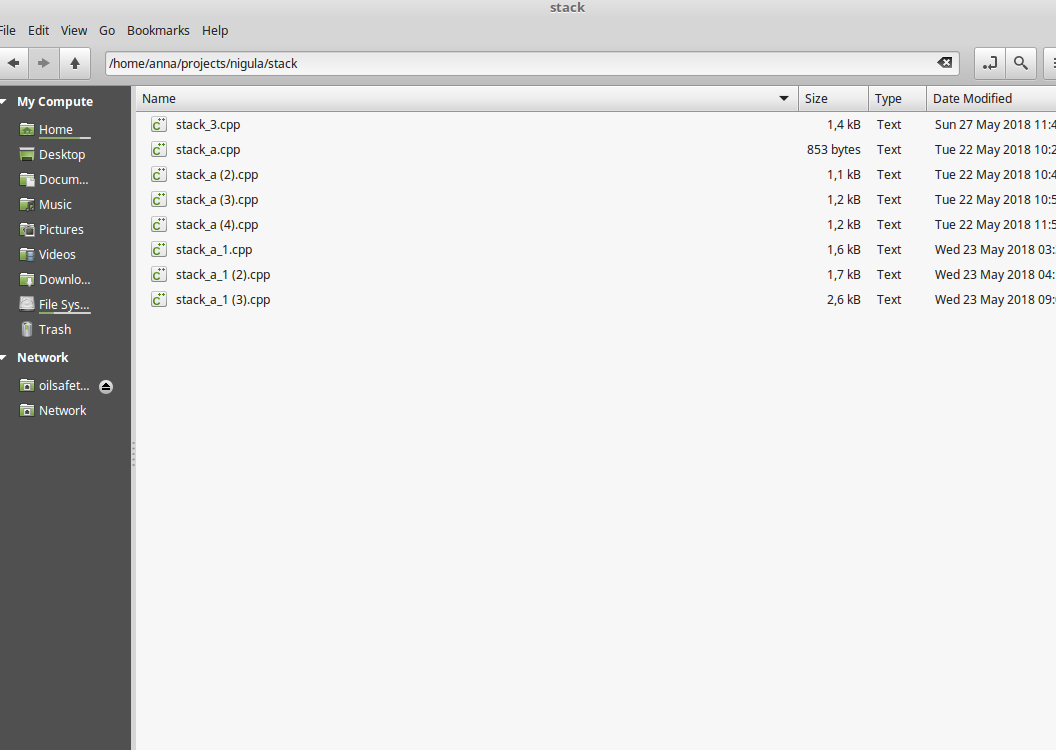

In [26]:
Image("images/no-git1.png")

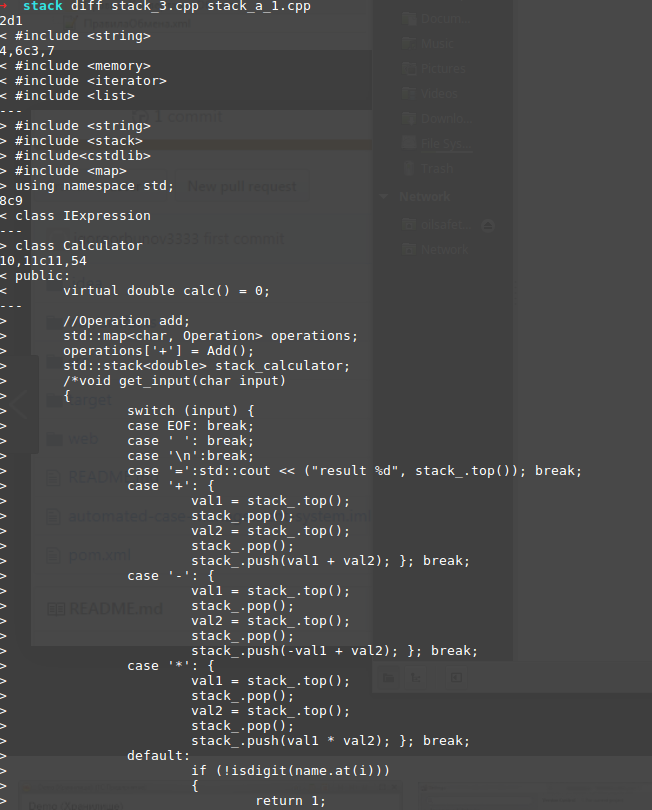

In [27]:
Image("images/no-git2.png")

А если много файлов? 
* Как не копировать всю директорию, а только те файлы, которые изменились?
* Можно удобнее просматривать изменения?
* Как легко к ним откатываться и указывать, какая версия сейчас рабочая?
* Как обмениваться кодом с коллегами?
* Как смотреть кто менял код?

На помощь приходят **СКВ**!

**CКВ** &mdash; это система, которая регистрирует все
изменения в файлах, а в дальнейшем позволяет вернуться к их более ранним
версиям и определить, кем и когда были сделаны конкретные изменения.

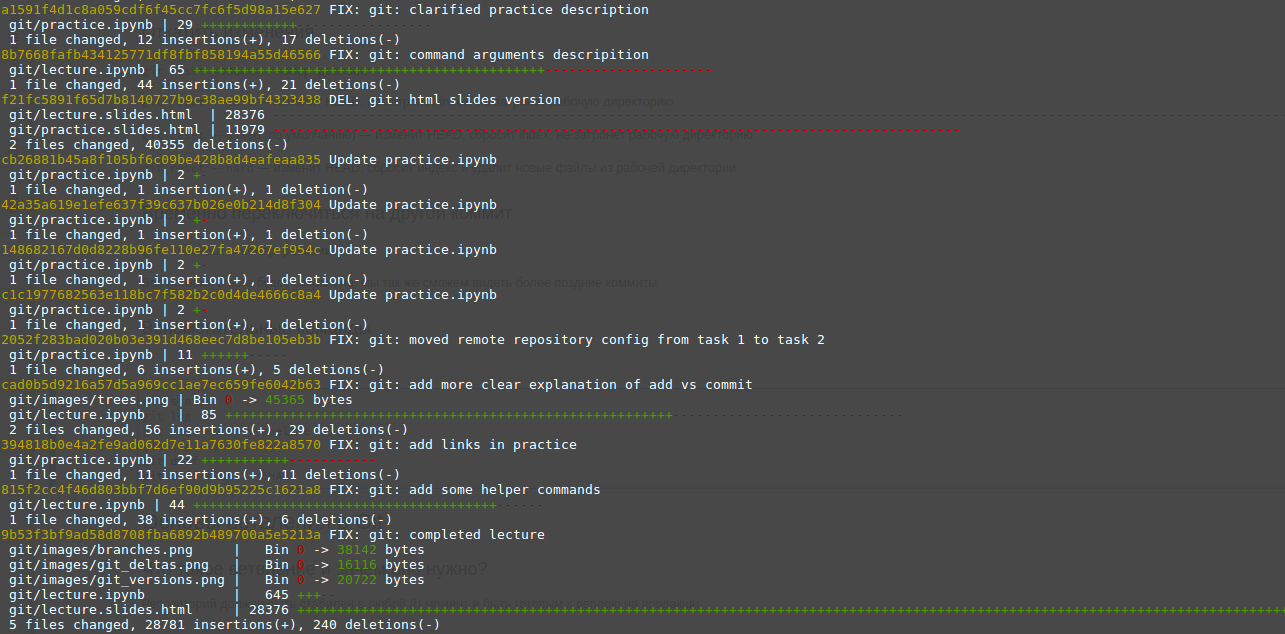

In [35]:
Image("images/git-log.png") 

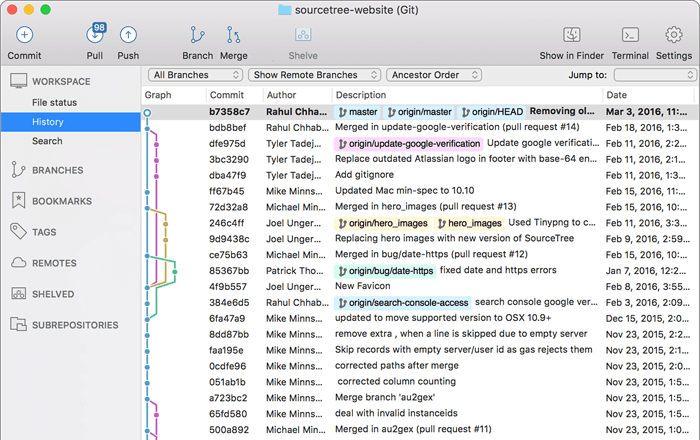

In [30]:
Image("images/branches_ex.png")

## Какие бывают СКВ?

### Централизованные СКВ (Subversion)

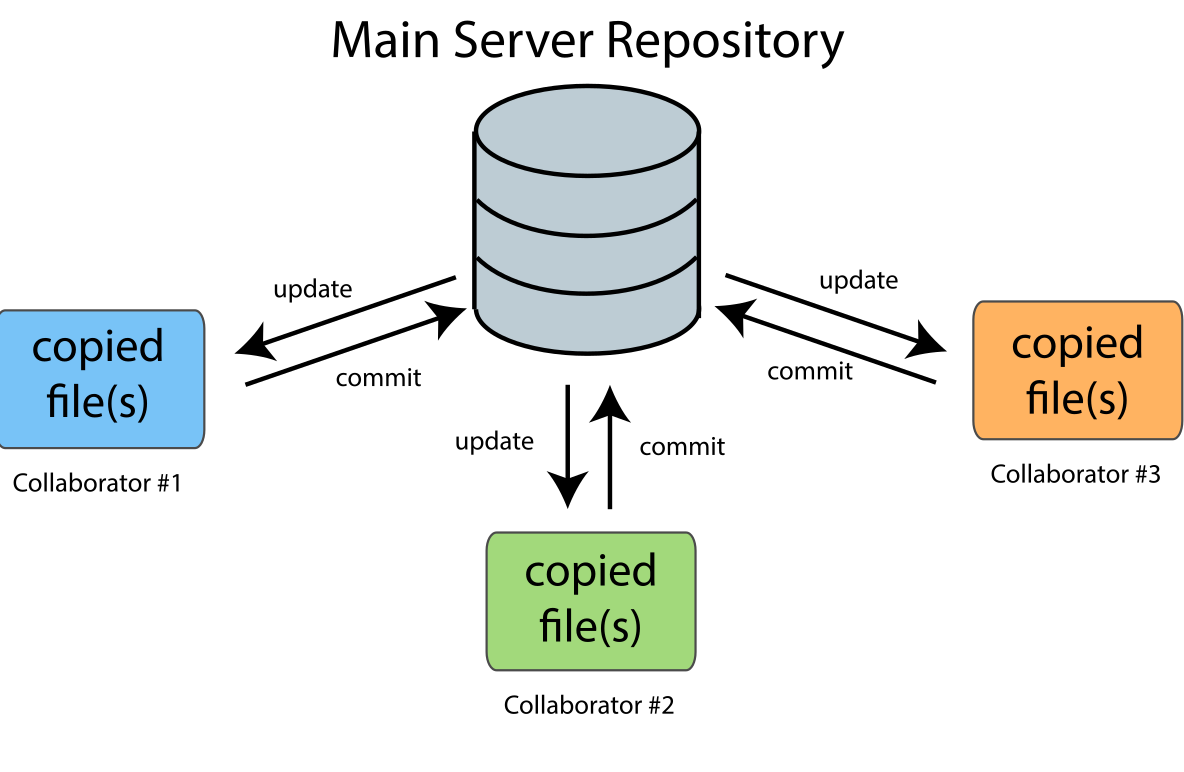

In [3]:
Image("images/vcs-centralized.png", width=600)

### Распределенные СКВ (Git)

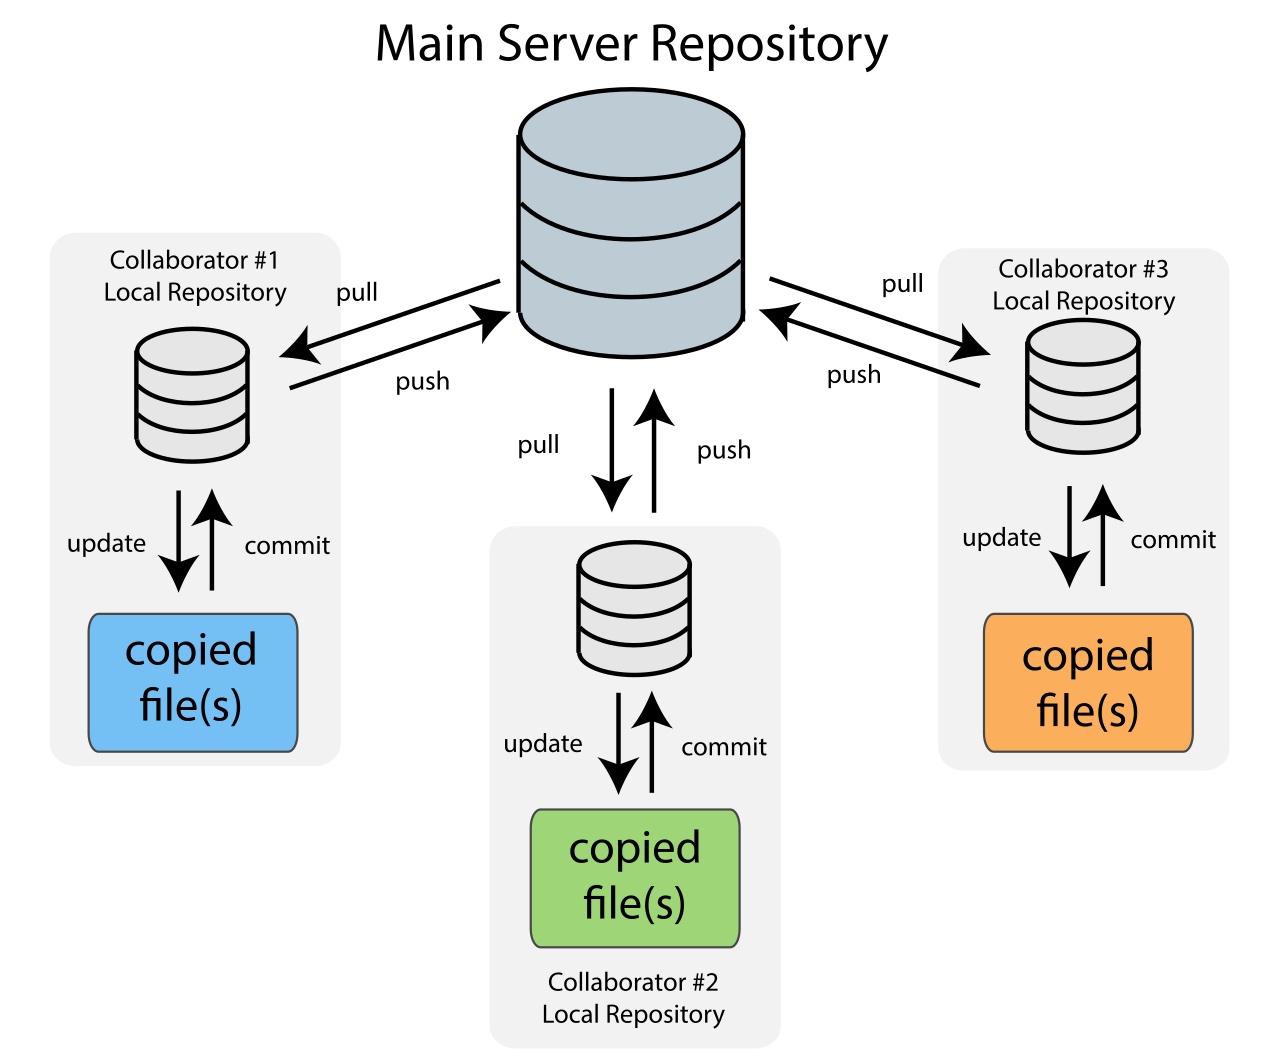

In [4]:
Image("images/vcs-distributed.png", width=600)

### Почему Git?

* Все плюсы распределенной СКВ &mdash; работа с локальным репозиторием ускоряет процесс, позволяет отменять и редактировать изменения до отправки их на сервер + не обязательно иметь доступ к серверу (можно хоть на флешку копировать код и носить домой),
* Git хранит «слепки» файлов в сжатом виде (в отличие от subversion), что тоже сильно ускоряет процесс
* Решено большое количество проблем со слиянием веток, которыми богат subversion

Немаловажную роль во всеобщей популярности Git’a в мире СКВ сыграл ресурс GitHub, на котором размещены тысячи репозиториев на различных языках.

### GitHub

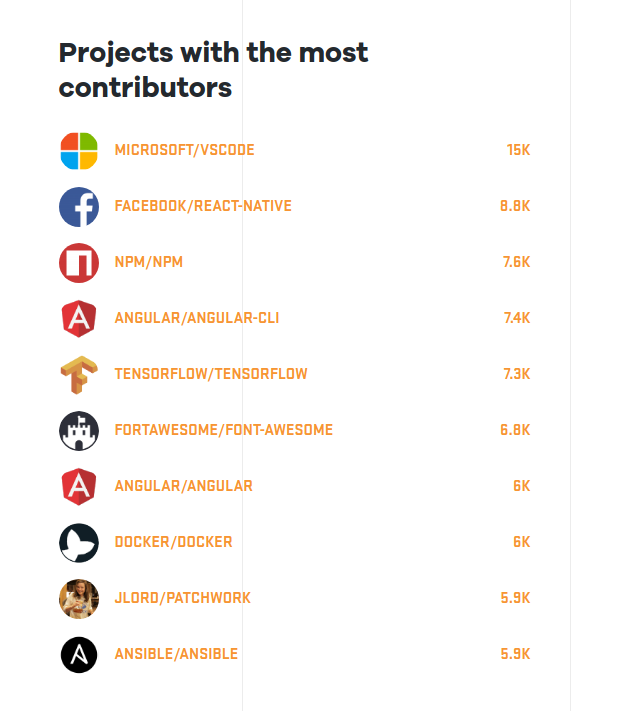

In [36]:
Image("images/github_projects.png")

### Другие web-cервисы, использующие Git

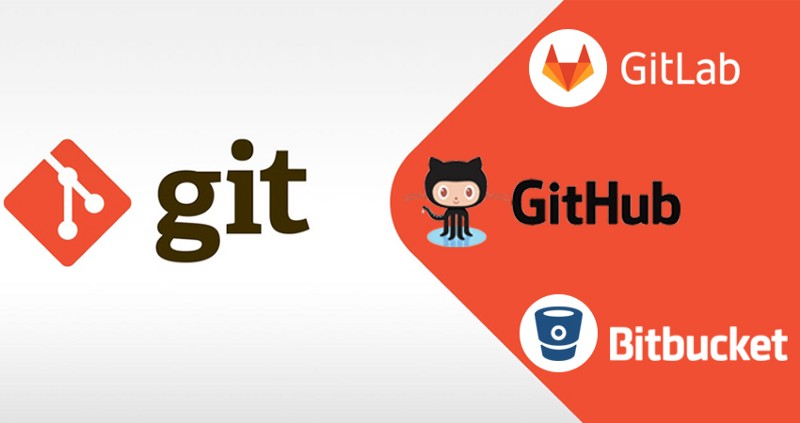

In [32]:
Image("images/github_gitlab_bitbucket.jpeg")

## Как устроен Git?

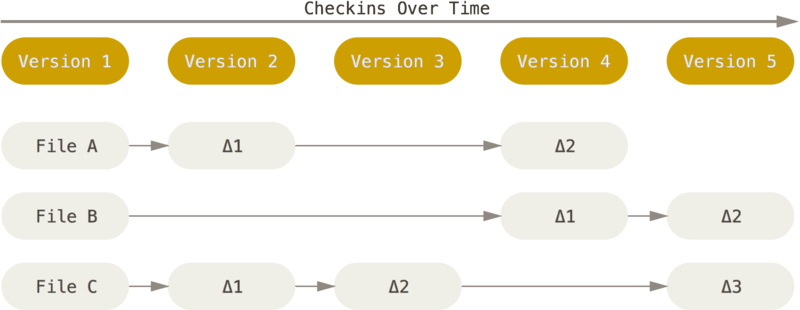

In [78]:
Image("images/git_deltas.png")

**Номер ревизии** (он же SHA-1 хеш) &mdash; контрольная сумма, которая вычисляется при сохранении файлов в Git-репозитории.

Минусы &mdash; номера ревизий идут не порядку.

### Как скачать репозиторий?

In [ ]:
git clone <путь_до_репозитория/имя_репозитория.git>
cd <имя_репозитория>

### Как добавить изменения?

In [ ]:
git add <file>
git commit -m "<Commit message>"
git push origin master

Добавление в локальную копиую *`add`*  + *`commit`*:

`add` &mdash; проиндексировать измененния в рабочем каталоге файлы, которые хотим добавить в локальную копию.
Т.е. добавить в очередь на коммит. Делает в точности "снимок" файла втот момент времени, когда выполнена эта команда. 

`commit` &mdash; "залить" изменения в локальную копию.

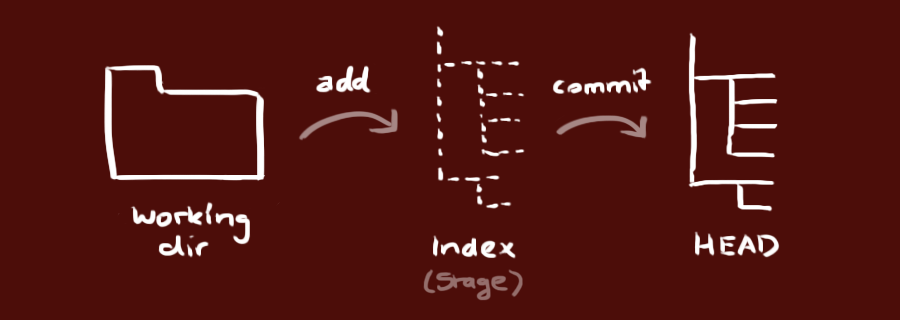

In [3]:
Image("images/trees.png")

*`Push`* &mdash; отправить изменения в удаленный репозиторий (запушить).

HEAD &mdash; специальный файл, который содержит указатель на последний коммит.

### Как получить обновления из удаленного репозитория?

In [ ]:
git pull

### Откатить изменения

In [ ]:
git reset <опции> <номер ревизии>

`git reset --soft` &mdash; изменит HEAD, не затронет index, не затронет рабочую директорию

`git reset --mixed` (по умолчанию) &mdash; изменит HEAD, сбросит index, не затронет рабочую директорию 

`git reset --hard` &mdash; изменит HEAD, сбросит индекс и удалит новые файлы из рабочей директории

### Временно переключиться на другой коммит

In [ ]:
git checkout <номер ревизии>

Вся история в логе будет сохранена, мы так же сможем видеть более поздние коммиты

### Вспомогательные команды

In [ ]:
git status
git log
git log --pretty=oneline
git log --stat
git diff
git diff <SHA1> <SHA2>

## Основы ветвления в Git

### Что такое ветвление и зачем оно нужно?

Репозиторий должен быть стабилен в любой (!) момент и быть готовым к деплою на продакшн.

Но когда мы хотим выкатить какую-то новую фичу, наш код может два дня не компилироваться, потом неделю работать неправильно, потом еще три дня рефакториться.

И что делать?

На помощь приходит механизм ветвления.

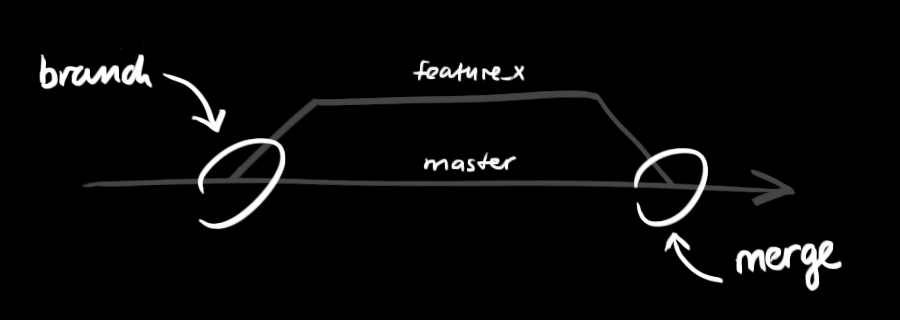

In [3]:
Image("images/branches.png")

`master` -- ветка, с которой работаем по умолчанию (он как раз должен быть стабилен в любой момент).

Поэтому мы никогда не делаем новые фичи и багфиксы сразу в master, используем для этого ветки.

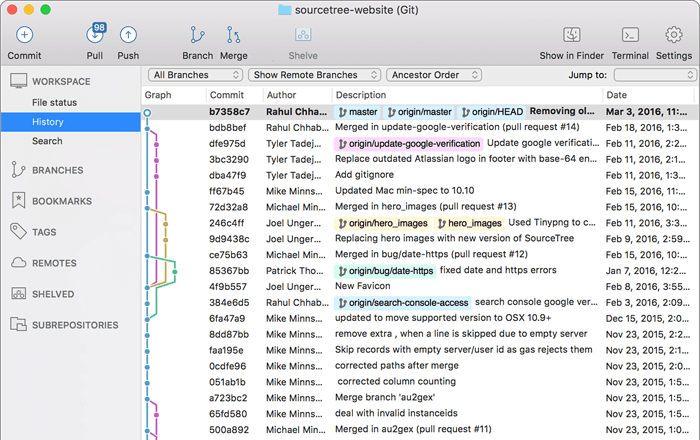

In [22]:
Image("images/branches_ex.png")

Ветки создаем по принципу -- одна фича — одна ветка. Один багфикс (если предполагается длиннее двух коммитов) — одна ветка. Один эксперимент — одна ветка. Одна фича внутри эксперимента — ветка от ветки.*

Всегда пишем вразумительные комментарии к коммитам.

После того, как фича (багфикс) написаны, оттестированы и готовы к продакшну, мержим ветку в master.

Без веток практически немыслима совместная разработка -- иначе как добавлять и тестировать новые "фичи" в проект, не ломая при этом основной код?!

### Команды для работы с ветками

Создать новую ветку и перейти в нее:

In [ ]:
git chekcout -b <имя_ветки>

Просмотреть список веток:

In [ ]:
git branch

Залить изменения в ветку:

In [ ]:
git push origin <имя_ветки>

Перейти в другую ветку (мастер):

In [ ]:
git checkout master

Слить ветку с мастером:

In [ ]:
git merge <branch-name>

Удалить ветку локально:

In [ ]:
git branch -D <имя_ветки>

Удалить ветку ветку напрямую с сервера:

In [ ]:
git push origin --delete <имя_ветки>

Вспомогательное:

In [ ]:
git branch -v
git branch --merged
git branch --no-merged

### Тэги

Для релизов программного обеспечения принято использовать не ветки, а тэги -- это "снимок" состояния ветки (обычно мастера) в конкретный момент времени.

In [ ]:
git tag 1.0.0 1b2e1d63ff

В тэг нельзя внести измеения.

## GitHub

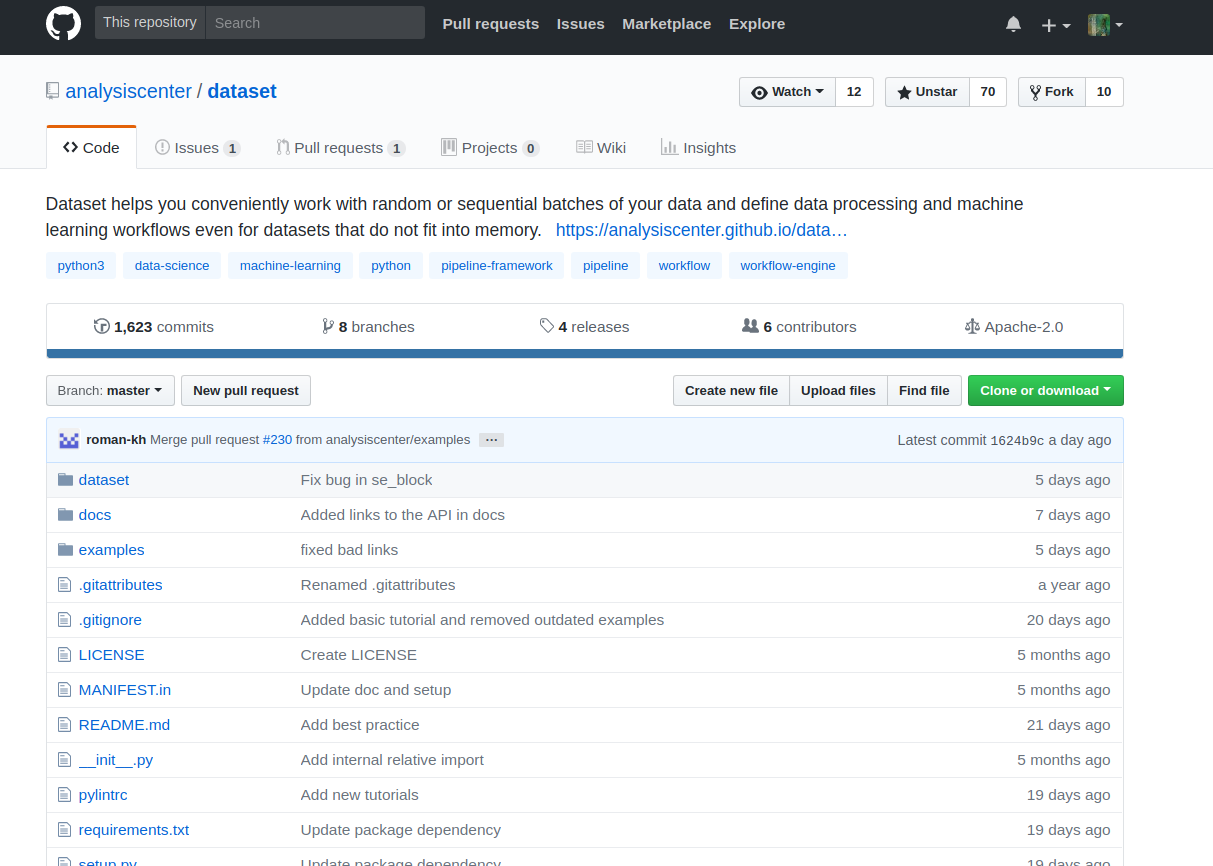

In [34]:
Image("images/github_screen.png")

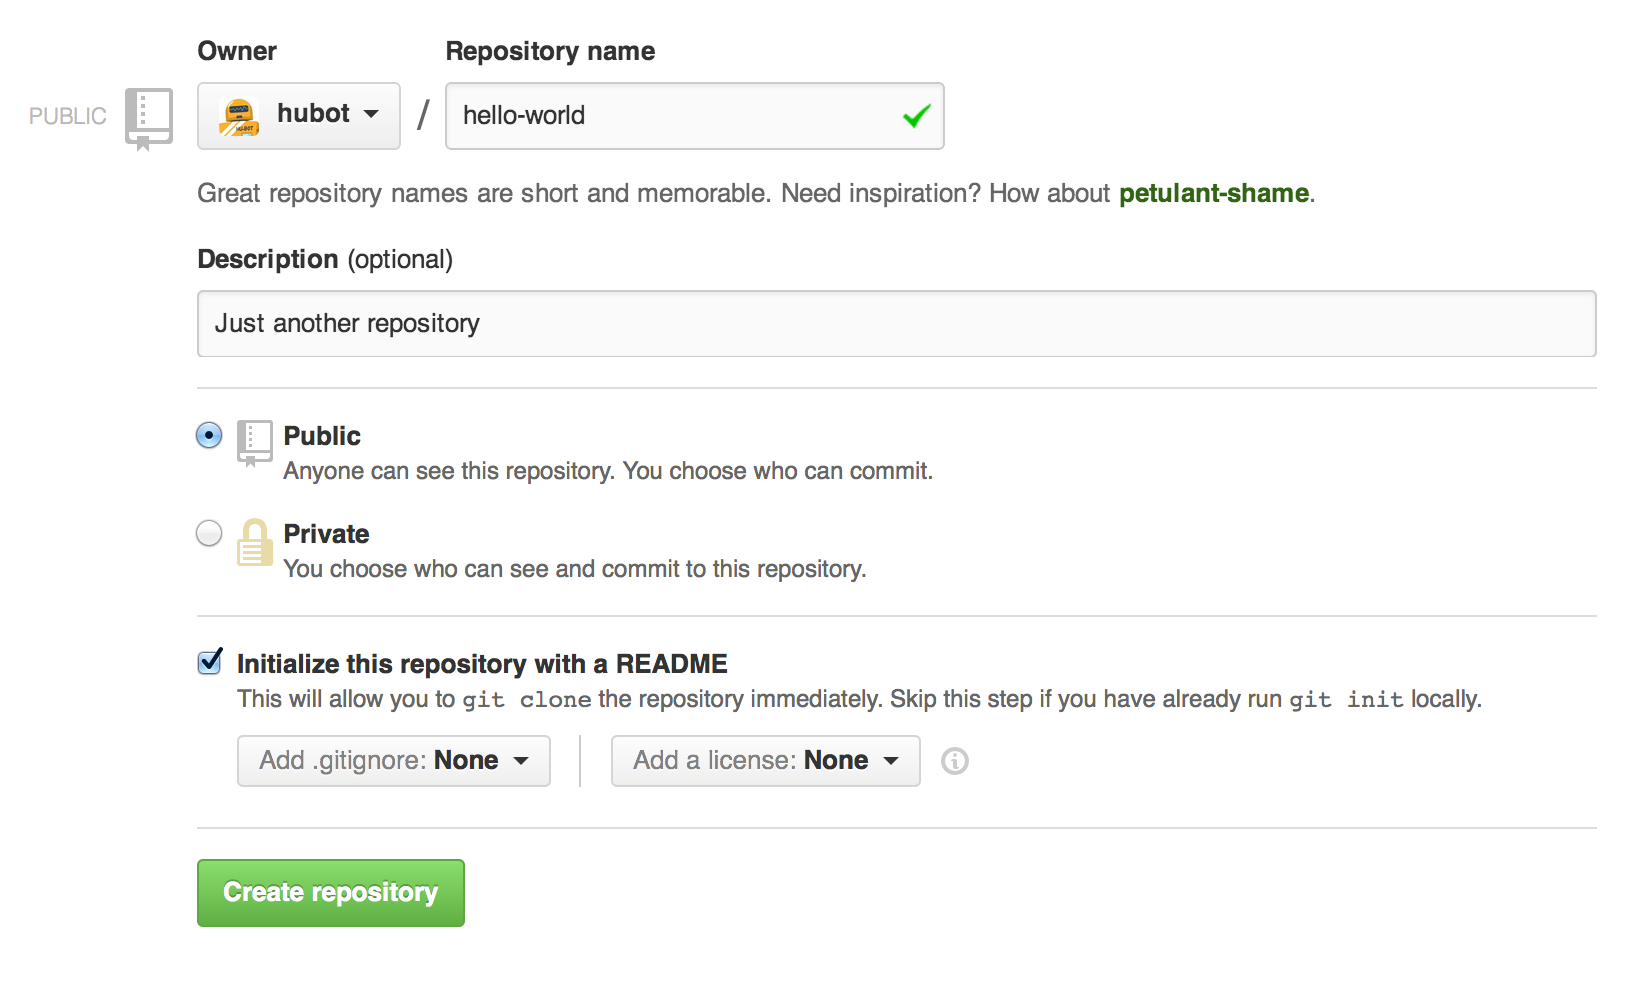

In [63]:
Image("images/github_create.png", width=800)

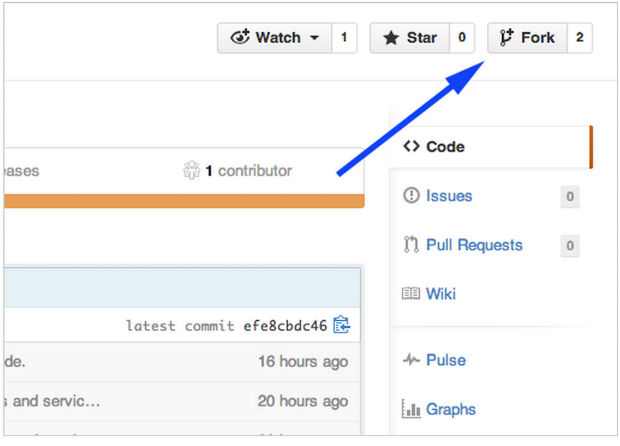

In [54]:
Image("images/github_fork.png")

Для подкачки обновлений из сиходного репозитория (с котоого был сделан fork), нужно добавить его в список удаленных (remote) репозиториев.

Все манипуляции с удалением/добавлением удаленных репозиториев производтся с помощью команды

In [ ]:
git remote

Например, просмотреть список адресов, с которых бдут подкачиваться обновленния:

In [ ]:
git remote -v

Настройка адреса удаленного репозитория, с которого будут подкачивать обновления:

In [ ]:
git remote add <идентификатор-репозитория> <адрес_удаленного_репозитория>

идентификатор &mdash; текстовое имя, по которому доступен удаленный репозиторий при обращении к нему в командах `git remote`, `git push`, `git pull` и др.

Комм.: По умолчанию при клонировании репозитория в список удаленных адресов добавляется репозиторий с локальным идентификатором `origin`.

Т.е., получить обновления из fork-нутого репозитория можно так:

In [ ]:
git pull <идентификатор-репозитория> <имя-ветки>

## Приложения, использующте Git

### Tortoise Git

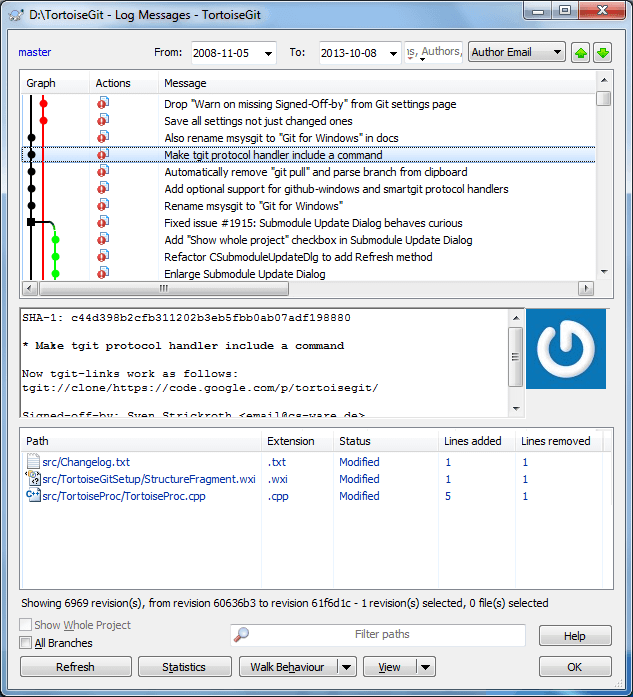

In [42]:
Image("images/tortoise-log.png")

### Интеграция с любыми современные IDE (PyCharm, VSCode, MSVC)

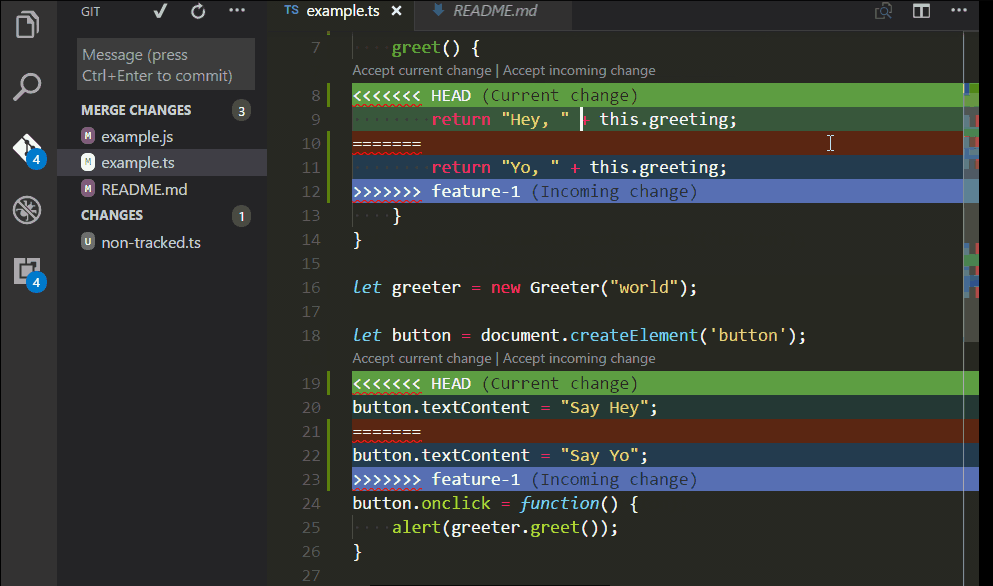

In [16]:
Image("images/vscode.png")

### Интеграция с любыми современными приложениями для управления проектов (Atlassian, Redmine) 

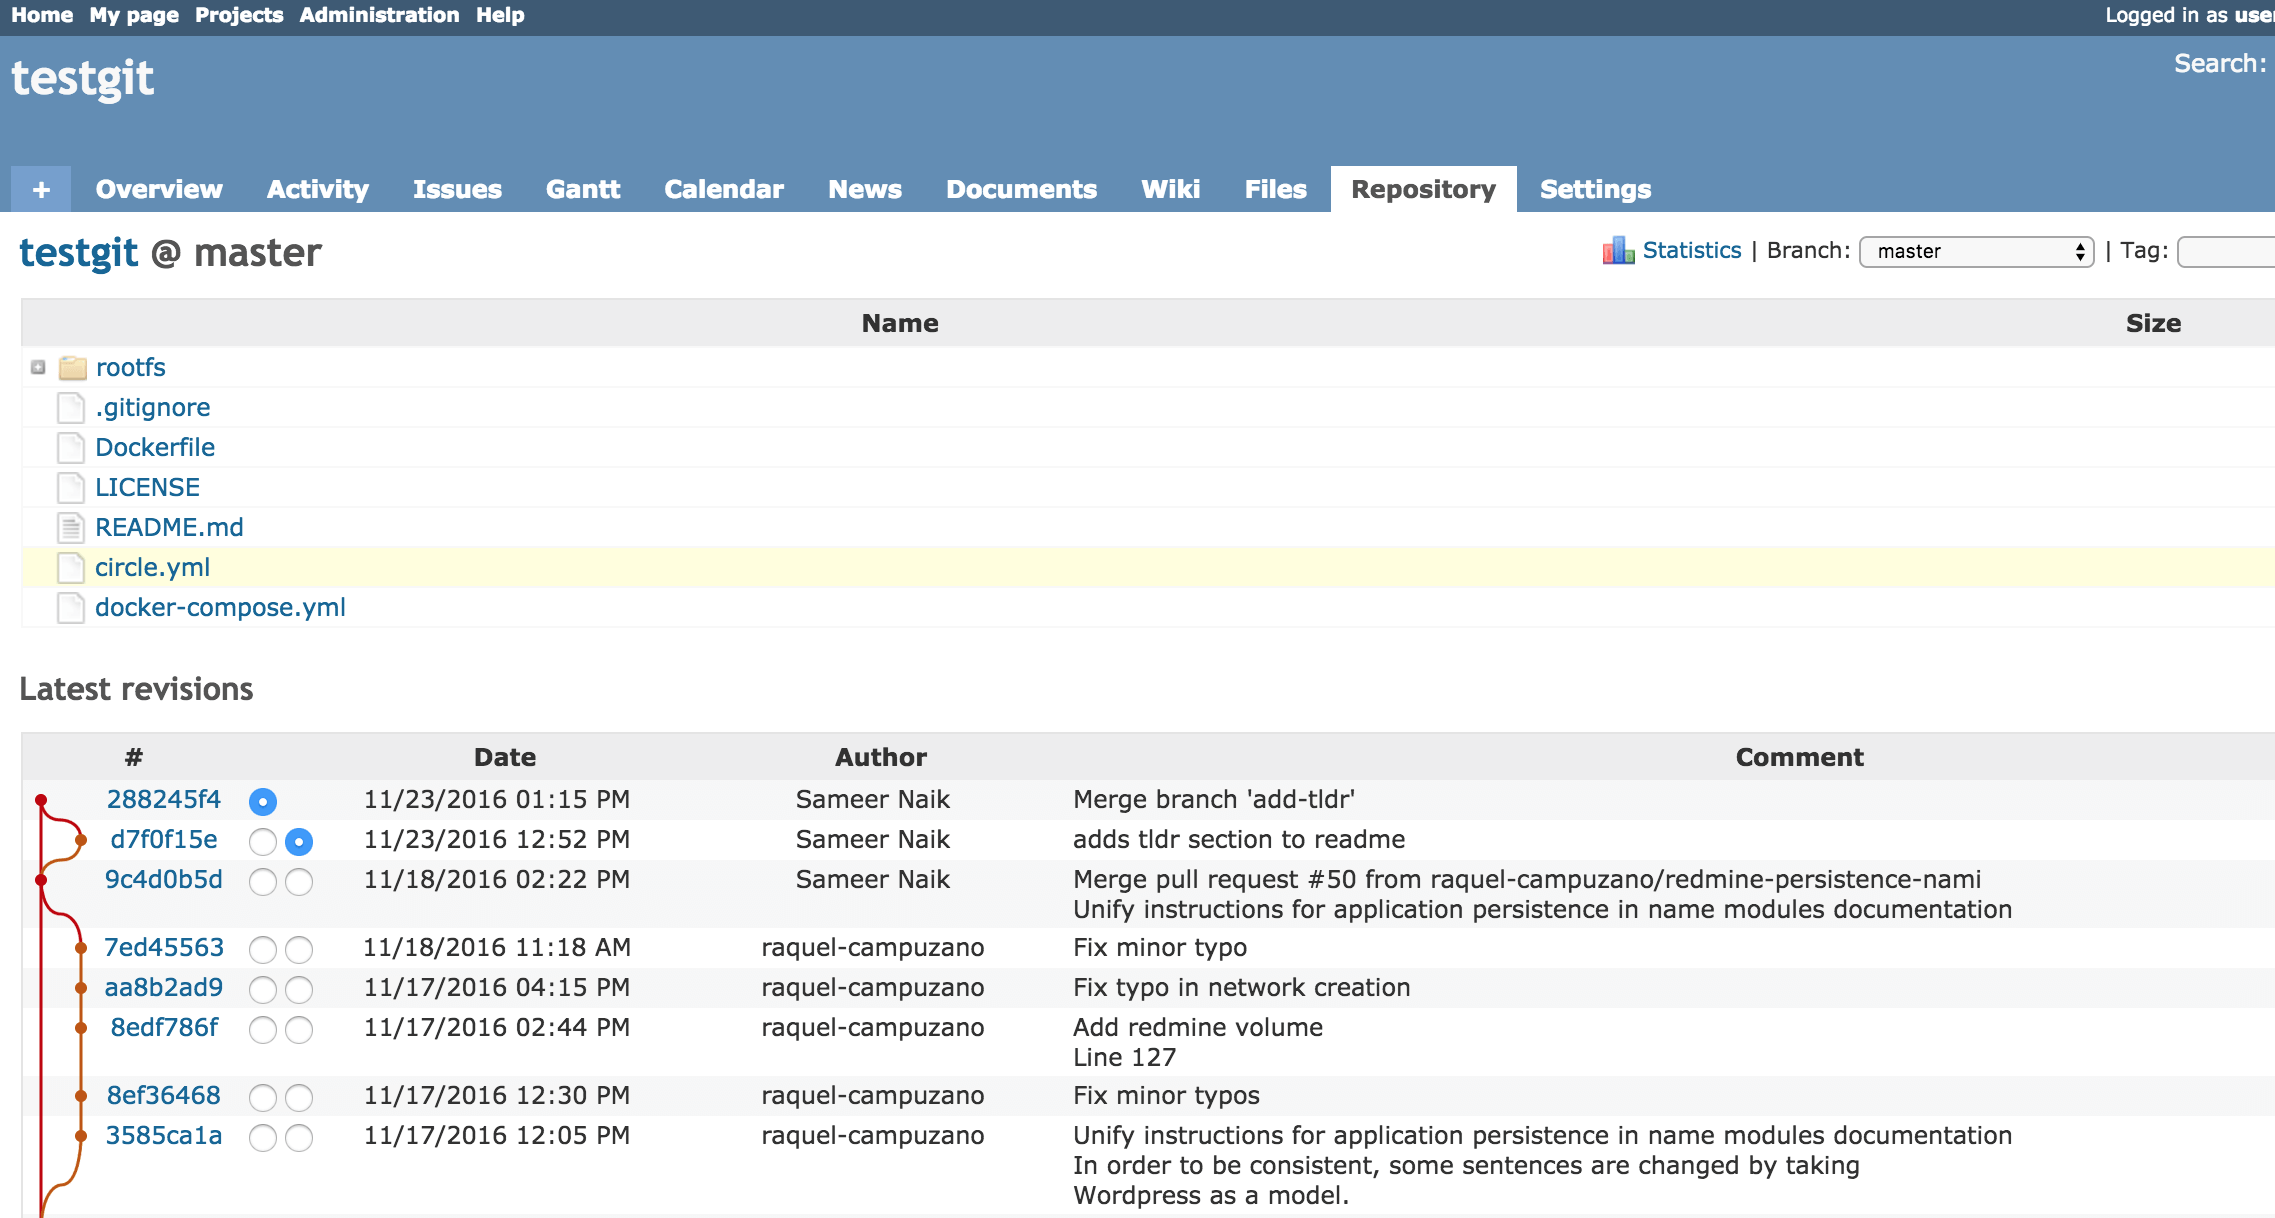

In [15]:
Image("images/redmine.png", width=1200)

### Simul  - контроль версий для MS Word, основанный на Git и Github

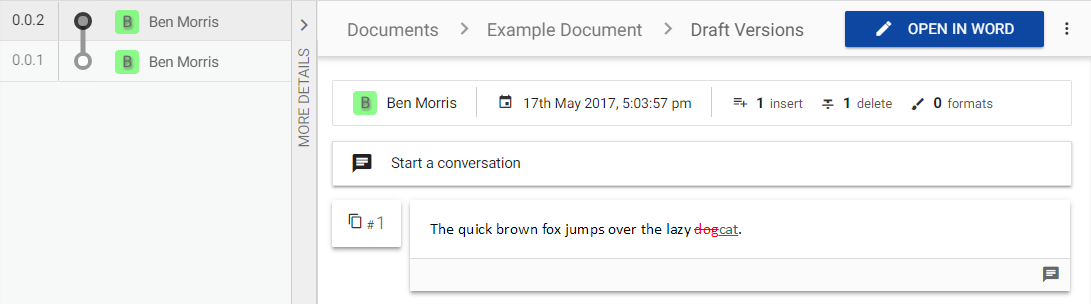

In [10]:
Image("images/simul.png")

## Ccылки

**[Ой, блин, гит!](https://ru.hexlet.io/blog/posts/oh-shit-git)**

**[«Волшебство git»](habrahabr.ru/blogs/Git/80909)**


[«Удачная модель ветвления для git» — перевод хорошей англоязычной статьи](https://habrahabr.ru/blogs/Git/106912)

[Интерактивный курс по работе с git из консоли](https://githowto.com)

[«Почему git» + обсуждение](https://habrahabr.ru/blogs/Git/106912)

[«Git для переходящих с SVN» + обсуждение](https://habrahabr.ru/blogs/development/68341)

[«Командная работа в git» + обсуждение](https://habrahabr.ru/blogs/Git/75990)

[Русский перевод книги «Pro Git» (переведено не до конца)](https://progit.org/book/ru)

[Инструкция-шпаргалка для начинающих](https://habrahabr.ru/blogs/Git/123111)

[Цикл постов «внутренности git»](https://los-t.livejournal.com/tag/git%20guts)

[Линус Торвальдс о git](https://lib.custis.ru/%D0%9B%D0%B8%D0%BD%D1%83%D1%81_%D0%A2%D0%BE%D1%80%D0%B2%D0%B0%D0%BB%D1%8C%D0%B4%D1%81_%D0%BE_GIT_%D0%BD%D0%B0_Google_Talks)

## Материалы семинара

https://github.com/asmagina1995/python-workshops/blob/master/git